In [11]:
import numpy as np #arrays
import matplotlib.pyplot as plt #visualising the results

def initial_n(): #initial number of neutrons per unit volume at r=0
    n=1                   #Initial value of n
    err=1                 #Initial error
    tol=1e-15             #Tolerance value
    count=0               #To track total number of iterations
  #Newton Raphson Method 
    while err>tol:
        count +=1
        fn=236*n**(2.54)+n*mn-rho_s
        dfn=236*2.54*n**(1.54)+mn
        temp = n- fn/dfn
        err = np.abs(n-temp)
        n=temp
    print("Newton-Raphson Converged after ", count, "iterations")
    return n

In [13]:
def rho(p):
    
    # Energy Density of a neutron star at a given pressure
    # rho_s - central density at r=0
    # mn - mass of a neutron
    # n- number density  at given pressure
    
    n=(p*rho_s/363.44)**(1/2.54)
    return (236.*n**2.54 + n*mn)/rho_s

In [14]:
def dp_dr(r,m,p,flag):
    
    #Pressure Gradient
    #r-distance from the centre of neutron star
    #m-mass enclosed within the value of r
    #p-pressure at the value of r
    #flag-choose between classical and relativistic models
    
    if flag==0:
        #classical model
        y= -m*rho(p)/(r**2+1e-20)
    else:
        #relativistic model
        y=-(p+rho(p))*(m+p*r**3)/(r**2-2*m*r + 1e-20)
        
        
    return y    

In [15]:
def dm_dr(r,m,p):
    #Mass Gradient
    #Same r,m,p as we used for pressure gradient are to be used for mass gradient
    return rho(p)*r**2

In [16]:
def rk4solver (r,m,p,h,flag):
    # Runge-Kutta 4th order method
    # Calculates 4 different pressure and mass gradients
    # k1i - Mass gradients
    # k2i - pressure gradients
    y= np.zeros(2)
    
    #Gradient 1 starting point
    k11=dm_dr(r,m,p)
    k21=dp_dr(r,m,p,flag)
    
    #Gradient 2 at mid of start and end point
    k12 = dm_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h)
    k22 = dp_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h, flag)

    #Gradient 3 at mid of start and end point
    k13 = dm_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h)
    k23 = dp_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h, flag)
    
    #Gradient 4 at the end point
    k14=dm_dr(r+h, m+h*k13, p+h*k23)
    k24=dp_dr(r+h, m+h*k11, p+h*k23,flag)
    
    #updation of m and p
    y[0]=m+h*(k11+2*k12+2*k13+k14)/6
    y[1]=p+h*(k21+2*k22+2*k23+k24)/6
    
    return y

In [17]:
def plot_data(color, label):
    
    #Mass Profile
    plt.subplot(1,2,1)
    plt.plot(r*R0*1e-18, m*M0/Ms, color=color, linewidth=1.2, label=label)
    plt.xlabel('Distance, $r$(km)', fontsize=13)
    plt.ylabel('Mass, $M/M_(sun)$', fontsize=13)
    plt.title('Mass Profile of a Neutron Star', color = 'tab:red', weight='bold', fontsize = 15)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.legend(fontsize=13, frameon=False)
    
    #Pressure Profile
    plt.subplot(1,2,2)
    plt.plot(r*R0*1e-18, p*rho_s, color=color, linewidth=1.2, label=label)
    plt.xlabel('Distance, $r$(km)', fontsize=13)
    plt.ylabel('Mass, $P$ $(MeV/fm^{3})$', fontsize=13)
    plt.title('Pressure Profile of a Neutron Star', color = 'tab:red', weight='bold', fontsize = 15)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.legend(fontsize=13, frameon=False)
    
    
    

In [18]:
#Simulation parameters and Conversion factors

hc=197.327                            #conversion factor in MeV fm (h bar*c)
G= hc*6.67259e-45                     #gravitational constant in MeV^-1 fm^3 kg^-1
Ms=1.1157467e60                       #mass of Sun in MeV
rho_s=1665.3                          #central density of neutron star (density at r=0) in MeV/fm^3
M0=(4*3.14159265*(G**3)*rho_s)**(-0.5)
R0=G*M0
mn=938.926                            #mass of a neutron in MeV c^-2


In [19]:
#Initialising values and arrays

'''Values for radius, step size and tolerance value'''
N=1501                       #Total number of data points
r=np.linspace(0,15,N)        #Values of radius to compute enclosed mass within it 
h=r[1]-r[0]                  #step size for RK4solver
tol=9e-5                     #tolerance for RK4solver

'''Arrays to store the updation values in RK4Solver'''
m=np.zeros(N)                #mass
p=np.zeros(N)                #pressure

'''Initial Number Density of Neutrons at r=0'''
ni=initial_n()

'''Setting initial values in the array- values at the centre of the neutron star'''
r[0]=0                       #radius
m[0]=0                       #mass
p[0]=363.44*(ni**2.54)/rho_s #pressure

'''Setting flags for choosing between classical and relativistic model'''
flag_set=[0,1]

'''Printing Initial values'''
print("Initial number density, ni=", ni)
print("Initial Pressure, P[0]=", p[0]*rho_s, "MeV/fm^3")
print("Simulation range, R=0 to R=", r[-1]*R0*1e-18, "km") #1e-18 is the conversion factor from femtometers to kilometers
print("Step size for RK4 Solver:",h)

Newton-Raphson Converged after  5 iterations
Initial number density, ni= 1.2918969375342138
Initial Pressure, P[0]= 696.5487390842761 MeV/fm^3
Simulation range, R=0 to R= 90.36486611870906 km
Step size for RK4 Solver: 0.01



Classical Model Results: p<9e-05 found after 275 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  10.076418180199878 times Solar Mass
Radius of the Neutron Star =  16.627135365842467 km

Relativistic Model Results: p<9e-05 found after 161 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  1.8781620654622986 times Solar Mass
Radius of the Neutron Star =  9.759405540820579 km



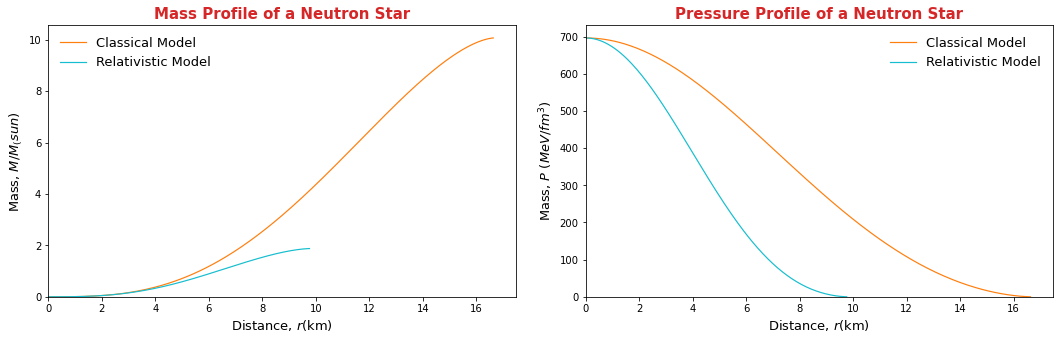

In [20]:
'''Using Rk4 Numerical Method for modelling a neutron star'''
plt.figure(figsize = (18,5))                                        # setting up the figure size of objects
for k in range (0,2):                                              # k will take up two values in this run ---> 0 and 1
    flag=flag_set[k]                                               # flag_set[0] =0, flag_set[1] =1 
    for i in range(0,N-1):                                         # for 1500 iterations
        if flag ==0:                                               # if the flag is set to 0
            [m[i+1], p[i+1]]= rk4solver(r[i],m[i],p[i],h,flag)     # use classical model
        else:                                                      # if not 0
            [m[i+1], p[i+1]]= rk4solver(r[i],m[i],p[i],h,flag)     # use relativistic model
        if p[i+1]<tol:                                             # if the value of the pressure goes below tolerance 
            break                                                  # the simulation is completed
    print()                                                        # for a new line between outputs
    if i==N-2:                                                     # if the pressure value does not go below the tolerance
        lbl1="Program didn't converge to P=0, extend the maximum value of r" #print to increase iteration
    else:
        lbl1=f"p<{tol} found after {i} runs"
    ''' Keep only the used indices of array discarding the remaining ones'''    
    m= m[:i+2]    #m[0:i+2--> Exclusive index]
    p= p[:i+2]
    r= r[:i+2]
            
    '''Visualising Results'''
    if flag == 0:
        lbl= "Classical Model"
        plot_data('tab:orange', "Classical Model")
    else:
        lbl= "Relativistic Model"
        plot_data('tab:cyan', "Relativistic Model")
     
    '''Printing the overall output'''
    print("=========================================================")    
    print(lbl, "Results:", lbl1)
    print("=========================================================")
    print("Initial density, rho_s = ", rho_s, "MeV/fm^3")
    print("Total mass = ", m[-1]*M0/Ms, "times Solar Mass")
    print("Radius of the Neutron Star = ", r[-1]*R0*1e-18,"km")
print()
plt.subplots_adjust(wspace=0.15)
    
    